In [1]:
import math
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
from graphviz import Graph

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
dataframe = pd.read_csv("csv_files/complex_data.csv")

In [ ]:
dataframe

In [6]:
nb_players = len(dataframe.index)
print(nb_players)

6


In [7]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           6 non-null      object
 1   Fifa note      6 non-null      int64 
 2   speed          6 non-null      int64 
 3   favorite meal  6 non-null      object
dtypes: int64(2), object(2)
memory usage: 320.0+ bytes
None


In [8]:
print(dataframe.columns)

Index(['Name', 'Fifa note', 'speed', 'favorite meal'], dtype='object')


In [9]:
print(dataframe.head(10))

             Name  Fifa note  speed favorite meal
0      Toni Kroos         90     80         pasta
1    David De Gea         91     70         fries
2    Sergio Ramos         91     75         pasta
3   Kikyan Mbappé        100    100         fries
4  Mohammed Salah         88     95         pasta
5    Mats Hummels         89     73    vegetables


In [10]:
player_id = 1
print(f"---\nall information on player {player_id}\n---")
print(dataframe.loc[player_id])

---
all information on player 1
---
Name             David De Gea
Fifa note                  91
speed                      70
favorite meal           fries
Name: 1, dtype: object


In [11]:
def compute_dissimilarity(player_1_id, player_2_id):
    """
        Compute  dissimilarity betwwen two players
        based on their id.

        The meal is not a quantitative attribute.
        It is called a categorical variable.
        We must handle it differently than quantitative
        attributes.
    """
    player_1_note = dataframe.loc[player_1_id][1]
    player_2_note = dataframe.loc[player_2_id][1]

    player_1_speed = dataframe.loc[player_1_id][2]
    player_2_speed = dataframe.loc[player_2_id][2]

    player_1_meal = dataframe.loc[player_1_id][3]
    player_2_meal = dataframe.loc[player_2_id][3]

    if player_1_meal == player_2_meal:
        dissimilarity_meal = 0
    else:
        dissimilarity_meal = 1

    # EDIT HERE
    dissimilarity = math.sqrt(
        (player_1_note-player_2_note)**2+(player_1_speed-player_2_speed)**2+dissimilarity_meal)

    print("----")
    player_1_name = dataframe.loc[player_1_id]["Name"]
    player_2_name = dataframe.loc[player_2_id]["Name"]
    print(f"plyr 1 {player_1_name}, plyr 2 {player_2_name}, dissimilarity: {dissimilarity}")
    return dissimilarity

In [12]:
# build a dissimilarity matrix
dissimilarity_matrix = np.zeros((nb_players, nb_players))
print("compute dissimilarities")
for player_1_id in range(nb_players):
    for player_2_id in range(nb_players):
        dissimilarity = compute_dissimilarity(player_1_id, player_2_id)
        dissimilarity_matrix[player_1_id, player_2_id] = dissimilarity

print("dissimilarity matrix")
print(dissimilarity_matrix)

compute dissimilarities
----
plyr 1 Toni Kroos, plyr 2 Toni Kroos, dissimilarity: 0.0
----
plyr 1 Toni Kroos, plyr 2 David De Gea, dissimilarity: 10.099504938362077
----
plyr 1 Toni Kroos, plyr 2 Sergio Ramos, dissimilarity: 5.0990195135927845
----
plyr 1 Toni Kroos, plyr 2 Kikyan Mbappé, dissimilarity: 22.38302928559939
----
plyr 1 Toni Kroos, plyr 2 Mohammed Salah, dissimilarity: 15.132745950421556
----
plyr 1 Toni Kroos, plyr 2 Mats Hummels, dissimilarity: 7.14142842854285
----
plyr 1 David De Gea, plyr 2 Toni Kroos, dissimilarity: 10.099504938362077
----
plyr 1 David De Gea, plyr 2 David De Gea, dissimilarity: 0.0
----
plyr 1 David De Gea, plyr 2 Sergio Ramos, dissimilarity: 5.0990195135927845
----
plyr 1 David De Gea, plyr 2 Kikyan Mbappé, dissimilarity: 31.32091952673165
----
plyr 1 David De Gea, plyr 2 Mohammed Salah, dissimilarity: 25.199206336708304
----
plyr 1 David De Gea, plyr 2 Mats Hummels, dissimilarity: 3.7416573867739413
----
plyr 1 Sergio Ramos, plyr 2 Toni Kroos, dis

In [13]:
threshold = 3
# build a graph from the dissimilarity
dot = Graph(comment='Graph created from complex data',
            strict=True)
for player_id in range(nb_players):
    player_name = dataframe.loc[player_id][0]
    dot.node(player_name)

for player_1_id in range(nb_players):
    # we use an undirected graph so we do not need
    # to take the potential reciprocal edge
    # into account
    for player_2_id in range(nb_players):
        # no self loops
        if not player_1_id == player_2_id:
            player_1_name = dataframe.loc[player_1_id][0]
            player_2_name = dataframe.loc[player_2_id][0]
            # use the threshold condition
            if dissimilarity_matrix[player_1_id, player_2_id] > threshold:
                dot.edge(player_1_name,
                         player_2_name,
                         color='darkolivegreen4',
                         penwidth='1.1')

# visualize the graph
dot.attr(label=f"threshold {threshold}", fontsize='20')
graph_name = f"images/complex_data_threshold_{threshold}"
dot.render(graph_name)

'images/complex_data_threshold_3.pdf'

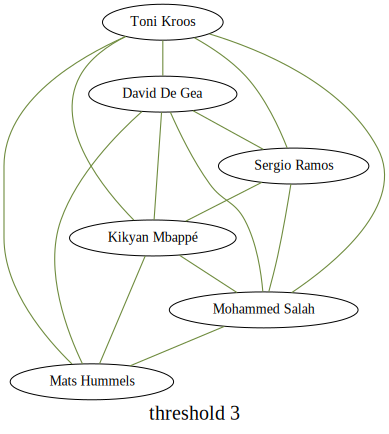

In [14]:
dot